# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [59]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [60]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

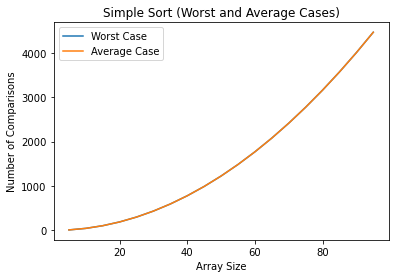

In [61]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [62]:
def bubble_sort(a):
    # Implement code to bubble sort the given array a in place.
    # Also return the number of comparisons. 
    num_compares = 0
    swapped = False
    n = len(a)

    # we must go through the unsorted portion of 
    # the list n times unless it is sorted
    for i in range(n) :
        for j in range(n - i - 1) : # only look at unsorted front of list
            num_compares += 1
            if a[j] > a[j+1] :
                a[j+1], a[j] = a[j], a[j+1] # swap larger for smaller element
                swapped = True
        
        # if array hasn't had any swaps it is sorted
        if not swapped :
            break
    
    return num_compares

### Complexity Analysis of Bubble Sort

The worst case of bubble sort occurs when the smallest element is at the very end of the list.  In order to move that item to the front, where it belongs, the algorithm will have to go through all iterations.  Each loop iteration, the smallest one would be moved only one space closer to the front.  I generated arrays that were in descending order to simulate the worst case.

The worst case complexity is theta(n^2) which is the same as the average.  The best case complexity is theta(n) but this only occurs when the array is already sorted or is all the same or it is an array of all the same number.  This is because there are two loops but a flag variable to terminate early if the array is sorted.


In [63]:
def make_descending_sorted_array(cap) :
    a = []
    # makes descending sorted array [cap, cap-1, ..., 2, 1]
    for i in range(cap) :
        a.append(cap-i)

    return a

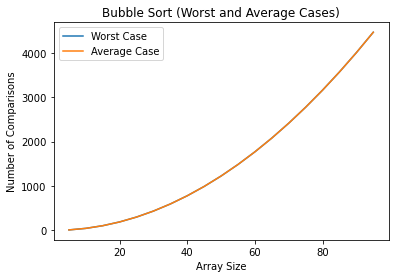

In [64]:
## Code to generate average and worst cases for Bubble Sort
array_sizes = range(5, 100, 5)

# Code for running sorting and generating number of compares
# Worst case is an array input that's in descending order
num_compares_wc = []
for n in array_sizes:
    a = make_descending_sorted_array(n)
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
# Randomized arrays for Average Case
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total+=nc
    avg = total / num_trials
    num_compares_random.append(avg)

# Code for plotting
plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Bubble Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.show()

----
### Merge Sort

In [65]:
def merge(a, start, mid, stop):
    num_compares = 0
    sort_array = []
    i = start
    j = mid + 1

    # Sort elements in sublists by adding
    # one-by-one to new array
    while i <= mid and j <= stop :
        if a[i] <= a[j] :
            sort_array.append(a[i])
            i += 1
        else :
            sort_array.append(a[j])
            j += 1
        num_compares += 1

    # Copy any remaining elements
    # Only one will execute
    while i <= mid :
        sort_array.append(a[i])
        i += 1
    while j <= stop :
        sort_array.append(a[j])
        j += 1

    # Copy sorted array back to original
    for num in sort_array :
        a[start] = num
        start += 1

    return num_compares


In [66]:
def merge_sort_recursive(a, start, stop) :
    num_compares = 0

    # Base Case: size <= 1
    if stop - start < 1 :
        return num_compares

    mid = (stop + start)//2 # divide array here

    # recursively divide each side until single
    # element lists are obtained
    num_compares += merge_sort_recursive(a, start, mid)
    num_compares += merge_sort_recursive(a, mid+1, stop)

    # sort while merging split array back together
    num_compares += merge(a, start, mid, stop)

    return num_compares

In [67]:
def merge_sort(a):
    num_compares = merge_sort_recursive(a, 0, len(a)-1)
    return num_compares

### Complexity Analysis of Merge Sort

The worst case of merge sort occurs when the array is perfectly jumbled to require every split to examine the maximum number of elements in the initial while loop of merge().

The i and j pointers must advance one at a time, i++ and then in the next comparison, j++.  All possible comparisons must be done in the first while loop because the second two do not examine any elements.

To create the worst case, I reverse engineered the algorithm to start with a sorted array and then after the divide steps, it merges one element from the first and then one from the second and back and forth.  This creates the maximun number of comparisons.

The average case complexity is the same as the worst case complexity at theta(nlogn).  This is what I read and it makes sense, but as you can see in the graphs the worst case appears asymptotically larger, at least as far as the compare operations go.


In [68]:
def make_ascending_sorted_array(size):
    a = []
    for i in range(size):
        a.append(i)

    return a

In [69]:
# Generating the worst case merge scenario
def wc_merge(wc, start, mid, stop):
    wc_array = []
    i = start
    j = mid + 1
    choose_from_first_array = False

    # Jumble elements in sublists by jumbling pairs
    if stop - start < 2 :
        wc[start], wc[stop] = wc[stop], wc[start] # swap sorted elements
        return
    
    while i <= mid and j <= stop :
        if choose_from_first_array == True :
            wc_array.append(wc[i])
            i += 1
            choose_from_first_array = False
        else:
            wc_array.append(wc[j])
            j += 1
            choose_from_first_array = True

    # Copy any remaining elements
    # Only one will execute
    while i <= mid :
        wc_array.append(wc[i])
        i += 1
    while j <= stop :
        wc_array.append(wc[j])
        j += 1

    # Copy sorted array back to original
    for num in wc_array :
        wc[start] = num
        start += 1
    
    return

In [70]:
def wc_mergesort_divide(wc, start, stop):
    # base case
    if stop - start < 1 :
        return

    mid = (start + stop)//2
    # divide left and right side till base case
    wc_mergesort_divide(wc, start, mid)
    wc_mergesort_divide(wc, mid + 1, stop)

    # merge and jumble
    wc_merge(wc, start, mid, stop)

    return


In [71]:
# Generates an array which yields worst case complexity for Merge Sort
def worst_case_mergesort(size):
    wc = make_ascending_sorted_array(size)

    wc_mergesort_divide(wc, 0, len(wc)-1)

    return wc

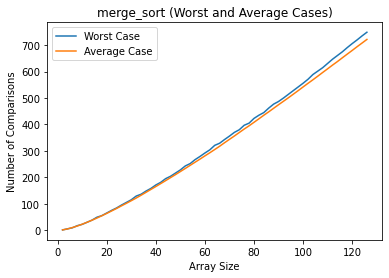

In [72]:
## Code to generate worst and average cases of Merge Sort
array_sizes = range(2, 128, 2)

# Code for running sorting and generating number of compares
# Worst case is an array input that's in descending order
num_compares_wc = []
for n in array_sizes:
    a = worst_case_mergesort(n)
    nc = merge_sort(a)
    num_compares_wc.append(nc)
    
# Randomized arrays for Average Case
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = merge_sort(a)
        total+=nc
    avg = total / num_trials
    num_compares_random.append(avg)

# Code for plotting
plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('merge_sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.show()


----
### Quick Sort


In [73]:
def quick_sort_partition(a, low, high, pivot_and_num_compares):
  pivot = a[high]
  j = low
  i = low
  
  # loop through elements of data from low to high - 1. We don't include the pivot (high)
  while j < high :
    # if current element is less than pivot swap a[i] and a[j]
    if a[j] < pivot :
      a[i], a[j] = a[j], a[i]
      i += 1
    pivot_and_num_compares[1] += 1
    j += 1

  # we must check data[i] against the pivot still
  if pivot < a[i] :
    a[i], a[high] = a[high], a[i]  
    pivot_and_num_compares[1] += 1

  pivot_and_num_compares[0] = i # set new pivot
  
  return pivot_and_num_compares

In [74]:
def quick_sort_recurse(a, low, high, pivot_and_num_compares):
    # if the list is larger than one element, partition and recurse left and right
    if low < high :
        pivot_and_num_compares = quick_sort_partition(a, low, high, pivot_and_num_compares)
        new_partition = pivot_and_num_compares[0]

        quick_sort_recurse(a, low, new_partition - 1, pivot_and_num_compares) # recurse left
        quick_sort_recurse(a, new_partition + 1, high, pivot_and_num_compares) # recurse right
    
    return pivot_and_num_compares

In [75]:
def quick_sort(a):
    pivot_and_num_compares = quick_sort_recurse(a, 0, len(a)-1, [len(a)-1, 0])

    num_compares = pivot_and_num_compares[1]
    
    return num_compares

### Complexity Analysis of Quick Sort

The difference between the average and worst cases for quick sort is enormous.  The worst case occurs when you choose a pivot which results in the array being partitioned to the same side every time, such as if you choose the last element as a pivot in a sorted array.  I chose to generate the worst case by using lists of a single element repeated which results in the same dilemna since my pivot is chosen to be the last element.  Here it must call quick_sort_partition n times, resulting in a complexity of theta(n^2).

Since this is a divide and conquer algorithm however, the average case, when the pivot is not chosen to be the worst possible item, is only theta(nlogn).  It's obvious by the graph that the average and worst case have that big of a difference between them.


In [76]:
def repeated_value_array(size) :
    i = 0
    rp = []
    while i < size :
        rp.append(13)
        i += 1

    return rp

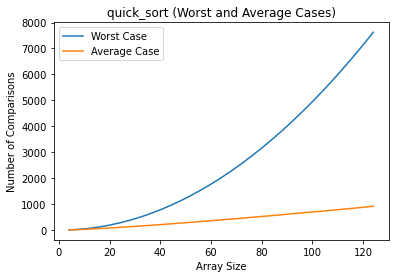

In [77]:
## Code to generate worst and average cases for Quick Sort
array_sizes = range(4, 128, 4)

# Code for running sorting and generating number of compares
# Worst case is acheived when all the values in the array are the same number
# Or depending on pivot, sorted in ascending or descenging manner
# I chose to implement this with arrays of a repeated value
num_compares_wc = []
for n in array_sizes:
    a = repeated_value_array(n)
    nc = quick_sort(a)
    num_compares_wc.append(nc)
    
# Randomized arrays for Average Case
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total+=nc
    avg = total / num_trials
    num_compares_random.append(avg)

# Code for plotting
plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('quick_sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.show()

-----
## Testing Code: Do not edit



In [78]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [79]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [80]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [81]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [82]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
